##  Machine Learning - Previsão de ações

<p> Criando um modelo preditivo completo para prever o preço de ações
    
<p> Para visualizar o código de uma determinada ação ou criptomoeda basta acessar o site https://br.financas.yahoo.com/    

Importar bibliotecas

In [ ]:
#importando a biblioteca do YahooFinance para baixar cotações
#Caso não tenha instalado ainda esse pacote, basta digitar !pip3 install yfinance
import yfinance as yF

# Imports para manipulação de dados
#import numpy as np
import pandas as pd

# Imports para visualização
import matplotlib.pyplot as plt
%matplotlib inline


# Importando os pacotes para o modelo preditivo
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score



#formatando valores com duas casas decimais
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Carrega o dataset
Cotacoes = yF.Ticker("ITUB3.SA")

# Opções de períodos 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y e ytd.
dados = Cotacoes.history(period="5y")
dados.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-31 00:00:00-03:00,16.02,16.07,15.20,15.50,969430,0.00,0.00
2020-04-01 00:00:00-03:00,15.10,15.10,14.45,14.58,904530,0.01,0.00
2020-04-02 00:00:00-03:00,14.61,14.88,14.47,14.71,614350,0.00,0.00
2020-04-03 00:00:00-03:00,14.71,14.71,13.70,14.04,1300420,0.00,0.00
2020-04-06 00:00:00-03:00,14.79,15.17,14.56,14.76,1069200,0.00,0.00


In [ ]:
# Retirar o indice do campo data
dados.reset_index(inplace=True)
dados.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-03-31 00:00:00-03:00,16.02,16.07,15.20,15.50,969430,0.00,0.00
1,2020-04-01 00:00:00-03:00,15.10,15.10,14.45,14.58,904530,0.01,0.00
2,2020-04-02 00:00:00-03:00,14.61,14.88,14.47,14.71,614350,0.00,0.00
3,2020-04-03 00:00:00-03:00,14.71,14.71,13.70,14.04,1300420,0.00,0.00
4,2020-04-06 00:00:00-03:00,14.79,15.17,14.56,14.76,1069200,0.00,0.00


In [ ]:
dados.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
1239,2025-03-25 00:00:00-03:00,28.49,28.94,28.44,28.56,460600,0.00,0.00
1240,2025-03-26 00:00:00-03:00,28.60,28.66,28.28,28.31,634100,0.00,0.00
1241,2025-03-27 00:00:00-03:00,28.32,28.39,28.16,28.32,316800,0.00,0.00
1242,2025-03-28 00:00:00-03:00,28.31,28.31,27.91,28.09,606300,0.00,0.00
1243,2025-03-31 00:00:00-03:00,28.06,28.06,27.56,27.80,271700,0.00,0.00


In [ ]:
dados.drop(dados.tail(1).index,inplace=True)
dados.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
1238,2025-03-24 00:00:00-03:00,28.46,28.47,28.25,28.46,372000,0.00,0.00
1239,2025-03-25 00:00:00-03:00,28.49,28.94,28.44,28.56,460600,0.00,0.00
1240,2025-03-26 00:00:00-03:00,28.60,28.66,28.28,28.31,634100,0.00,0.00
1241,2025-03-27 00:00:00-03:00,28.32,28.39,28.16,28.32,316800,0.00,0.00
1242,2025-03-28 00:00:00-03:00,28.31,28.31,27.91,28.09,606300,0.00,0.00


In [ ]:
# Vamos excluir as colunas que não serão utilizadas e renomear os campos
dados.drop('Dividends', axis=1, inplace=True)
dados.drop('Stock Splits', axis=1, inplace=True)
dados.columns = ['Data','Abertura','Maximo','Minimo','Fechamento','Volume']
dados.head()

,Data,Abertura,Maximo,Minimo,Fechamento,Volume
0,2020-03-31 00:00:00-03:00,16.02,16.07,15.20,15.50,969430
1,2020-04-01 00:00:00-03:00,15.10,15.10,14.45,14.58,904530
2,2020-04-02 00:00:00-03:00,14.61,14.88,14.47,14.71,614350
3,2020-04-03 00:00:00-03:00,14.71,14.71,13.70,14.04,1300420
4,2020-04-06 00:00:00-03:00,14.79,15.17,14.56,14.76,1069200


In [ ]:
# Vamos observar o nosso range de dados
print('Menor data: ', dados['Data'].min())
print('Maior data:', dados['Data'].max())

Menor data:  2020-03-31 00:00:00-03:00
Maior data: 2025-03-31 00:00:00-03:00


In [ ]:
# Vamos observar os dados referente a ultima data do nosso conjunto de dados
display(dados.loc[dados.index.max()])

,1243
Data,2025-03-31 00:00:00-03:00
Abertura,28.06
Maximo,28.06
Minimo,27.56
Fechamento,27.80
Volume,271700


In [ ]:
# Tipos de Dados
dados.dtypes

,0
Data,"datetime64[ns, America/Sao_Paulo]"
Abertura,float64
Maximo,float64
Minimo,float64
Fechamento,float64
Volume,int64


In [ ]:
# Volume de dados
dados.shape

(1244, 6)

In [ ]:
# Sumário estatístico
dados.describe()

,Abertura,Maximo,Minimo,Fechamento,Volume
count,1244.00,1244.00,1244.00,1244.00,1244.00
mean,19.56,19.78,19.35,19.56,814209.05
std,3.93,3.94,3.94,3.94,625794.31
min,14.07,14.19,13.70,14.04,118800.00
25%,16.59,16.81,16.35,16.56,459387.50
50%,18.37,18.57,18.16,18.34,661485.00
75%,22.99,23.16,22.86,22.99,989725.00
max,28.76,29.04,28.46,28.65,10778570.00


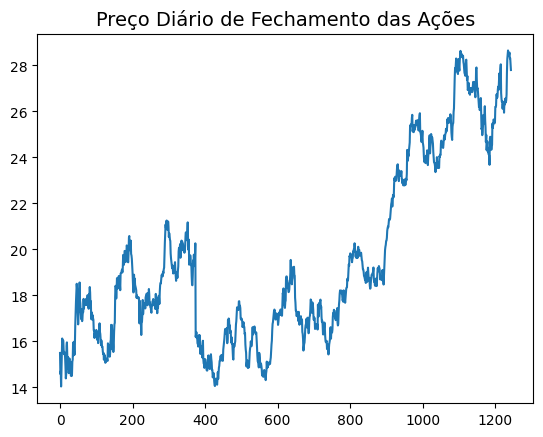

In [ ]:
# Plot
plt.plot(dados["Fechamento"])
plt.title("Preço Diário de Fechamento das Ações", size = 14)
plt.show()

In [ ]:
dados.head()

,Data,Abertura,Maximo,Minimo,Fechamento,Volume
0,2020-03-31 00:00:00-03:00,16.02,16.07,15.20,15.50,969430
1,2020-04-01 00:00:00-03:00,15.10,15.10,14.45,14.58,904530
2,2020-04-02 00:00:00-03:00,14.61,14.88,14.47,14.71,614350
3,2020-04-03 00:00:00-03:00,14.71,14.71,13.70,14.04,1300420
4,2020-04-06 00:00:00-03:00,14.79,15.17,14.56,14.76,1069200


In [ ]:
# Criando novos campos de Média Movel com 5 Dias, 14 Dias e 21 Dias
dados['mm5d'] = dados['Fechamento'].rolling(5).mean()
dados['mm14d'] = dados['Fechamento'].rolling(14).mean()
dados['mm21d'] = dados['Fechamento'].rolling(21).mean()

In [ ]:
dados.head(30)

,Data,Abertura,Maximo,Minimo,Fechamento,Volume,mm5d,mm14d,mm21d
0,2020-03-31 00:00:00-03:00,16.02,16.07,15.20,15.50,969430,NaN,NaN,NaN
1,2020-04-01 00:00:00-03:00,15.10,15.10,14.45,14.58,904530,NaN,NaN,NaN
2,2020-04-02 00:00:00-03:00,14.61,14.88,14.47,14.71,614350,NaN,NaN,NaN
3,2020-04-03 00:00:00-03:00,14.71,14.71,13.70,14.04,1300420,NaN,NaN,NaN
4,2020-04-06 00:00:00-03:00,14.79,15.17,14.56,14.76,1069200,14.72,NaN,NaN
5,2020-04-07 00:00:00-03:00,15.31,15.84,15.13,15.59,1356740,14.74,NaN,NaN
6,2020-04-08 00:00:00-03:00,15.33,16.13,15.33,16.13,1507770,15.05,NaN,NaN
7,2020-04-09 00:00:00-03:00,16.09,16.41,15.75,15.98,1458160,15.30,NaN,NaN
8,2020-04-13 00:00:00-03:00,16.02,16.21,15.54,16.01,681890,15.69,NaN,NaN
9,2020-04-14 00:00:00-03:00,16.28,16.63,16.04,16.04,647020,15.95,NaN,NaN


In [ ]:
dados.dropna(inplace=True)

In [ ]:
dados.shape

(1224, 9)

In [ ]:
qtd_linhas = len(dados)
qtd_linhas_treino = qtd_linhas - 400
qtd_linhas_teste = qtd_linhas - 20

qtd_linhas_validacao = qtd_linhas_treino - qtd_linhas_teste

info = (
    f"linhas treino = 0:{qtd_linhas_treino}"
    f" linhas teste = 0:{qtd_linhas_treino}:{qtd_linhas_teste}"
    f" linhas validacao = 0:{qtd_linhas_teste}:{qtd_linhas}"

)

info

'linhas treino = 0:824 linhas teste = 0:824:1204 linhas validacao = 0:1204:1224'

In [ ]:
# Separando variaveis PREDITORAS e variavel ALVO
preditoras = dados.drop(['Data', 'Fechamento','Volume'], axis=1)
target = dados['Fechamento']

In [ ]:
preditoras.head()

,Abertura,Maximo,Minimo,mm5d,mm14d,mm21d
20,15.57,15.74,15.42,15.23,15.47,15.32
21,15.03,15.05,14.83,15.32,15.38,15.29
22,15.15,15.79,14.94,15.47,15.33,15.33
23,15.46,15.46,15.04,15.34,15.27,15.35
24,15.45,15.45,14.41,15.07,15.20,15.37


In [ ]:
preditoras.tail()

,Abertura,Maximo,Minimo,mm5d,mm14d,mm21d
1239,28.49,28.94,28.44,28.51,27.57,27.13
1240,28.60,28.66,28.28,28.45,27.72,27.22
1241,28.32,28.39,28.16,28.42,27.84,27.32
1242,28.31,28.31,27.91,28.35,27.95,27.41
1243,28.06,28.06,27.56,28.22,28.05,27.49


In [ ]:
# Normalizando os dados
scaler = MinMaxScaler().fit(preditoras)
preditoras_normalizadas = scaler.transform(preditoras)

In [ ]:
# Verificando a normalização realizada
print('Preditoras: ', preditoras_normalizadas.shape)
print(preditoras_normalizadas)

Preditoras:  (1224, 6)
[[0.10245979 0.1043088  0.09898036 0.0733964  0.08232575 0.06400814]
 [0.06540404 0.05769514 0.05843402 0.07951505 0.07646358 0.06169365]
 [0.07401178 0.10739866 0.06571735 0.09014596 0.07293274 0.06426199]
 ...
 [0.96979182 0.9562237  0.97927512 0.99316386 0.96654044 0.93755907]
 [0.96911144 0.95083587 0.96200434 0.98842041 0.97432901 0.9436999 ]
 [0.95210229 0.93399887 0.93782523 0.97921254 0.98151917 0.9494653 ]]


In [ ]:
# Separando dados para treino e teste
X_Train = preditoras_normalizadas[:qtd_linhas_treino]
X_test = preditoras_normalizadas[qtd_linhas_treino:qtd_linhas_teste]

Y_Train = target[:qtd_linhas_treino]
Y_test = target[qtd_linhas_treino:qtd_linhas_teste]

print(len(X_Train), len(Y_Train))
print(len(X_test), len(Y_test))

824 824
380 380


In [ ]:
# Treinamento usando regressão linear
lr = linear_model.LinearRegression()
lr.fit(X_Train, Y_Train )
predicao = lr.predict(X_test)
cd = r2_score(Y_test, predicao)

f'Coeficiente de determinação:{cd * 100:.2f}'

#Lembrete: Coeficiente de determinação determina a aproximação da linha de regressão.
# Quanto mais próximo de 1 melhor.

'Coeficiente de determinação:99.84'

In [ ]:
# Treinamento usando rede neural
rn = MLPRegressor(max_iter = 2000)
rn.fit(X_Train, Y_Train )
predicao = rn.predict(X_test)
cd = rn.score(X_test,Y_test)

f'Coeficiente de determinação:{cd * 100:.2f}'

#Lembrete: Coeficiente de determinação determina a aproximação da linha de regressão.
# Quanto mais próximo de 1 melhor.

'Coeficiente de determinação:94.01'

In [ ]:
# Executando a previsão
previsao = preditoras_normalizadas[qtd_linhas_teste:qtd_linhas]
data_pregao_full = dados['Data']
data_pregao = data_pregao_full[qtd_linhas_teste:qtd_linhas]

res_full = dados['Fechamento']
res = res_full[qtd_linhas_teste:qtd_linhas]

pred = lr.predict(previsao)

df = pd.DataFrame({'Data_Pregão':data_pregao, 'Real': res, 'Previsão':pred})

df.set_index('Data_Pregão', inplace = True)

df

,Real,Previsão
Data_Pregão,,
2025-02-28 00:00:00-03:00,25.95,26.07
2025-03-05 00:00:00-03:00,26.36,26.21
2025-03-06 00:00:00-03:00,26.30,26.43
2025-03-07 00:00:00-03:00,26.55,26.53
2025-03-10 00:00:00-03:00,26.56,26.43
2025-03-11 00:00:00-03:00,26.39,26.40
2025-03-12 00:00:00-03:00,26.48,26.46
2025-03-13 00:00:00-03:00,26.74,26.80
2025-03-14 00:00:00-03:00,27.69,27.51


Previsão para o dia seguinte

In [ ]:
# Pega o último pregão disponível
dados_hoje = yF.download("ITUB3.SA", period="1d")

# Renomeia as colunas para manter consistência (igual foi feito no dataframe principal)
dados_hoje = dados_hoje.rename(columns={
    'Open': 'Abertura',
    'High': 'Maximo',
    'Low': 'Minimo',
    'Close': 'Fechamento',  # Aqui está a correção principal
    'Volume': 'Volume'
})
# Verifica se temos dados válidos


if dados_hoje.empty:
    print("Não foi possível obter dados do último pregão.")
else:
    try:
        # Calcula médias móveis com os últimos dados históricos
        # USANDO A COLUNA 'Fechamento' que foi renomeada no dataframe principal
        ultimos_5d = dados['Fechamento'].iloc[-5:].mean()
        ultimos_14d = dados['Fechamento'].iloc[-14:].mean()
        ultimos_21d = dados['Fechamento'].iloc[-21:].mean()

        # Prepara os dados para amanhã
        dados_amanha = pd.DataFrame({
            'Abertura': [float(dados_hoje['Abertura'].iloc[-1])],
            'Maximo': [float(dados_hoje['Maximo'].iloc[-1])],
            'Minimo': [float(dados_hoje['Minimo'].iloc[-1])],
            'mm5d': [ultimos_5d],
            'mm14d': [ultimos_14d],
            'mm21d': [ultimos_21d]
        })

        # Normaliza e prevê
        X_amanha = scaler.transform(dados_amanha)
        previsao_amanha_lr = float(lr.predict(X_amanha)[0])
        previsao_amanha_rn = float(rn.predict(X_amanha)[0])

        # Exibe resultados
        print("\n" + "="*50)
        print(f"PREVISÃO PARA O PRÓXIMO PREGÃO:")
        print(f"- Data do último pregão: {dados_hoje.index[-1].strftime('%d/%m/%Y')}")
        print(f"- Preço de fechamento hoje: R$ {float(dados_hoje['Fechamento'].iloc[-1]):.2f}")
        print(f"- Previsão (Regressão Linear): R$ {previsao_amanha_lr:.2f}")
        print(f"- Previsão (Rede Neural): R$ {previsao_amanha_rn:.2f}")
        print("="*50 + "\n")

    except Exception as e:
        print(f"Erro ao gerar previsão: {str(e)}")


[*********************100%***********************]  1 of 1 completed


PREVISÃO PARA O PRÓXIMO PREGÃO:
- Data do último pregão: 31/03/2025
- Preço de fechamento hoje: R$ 27.81
- Previsão (Regressão Linear): R$ 27.70
- Previsão (Rede Neural): R$ 28.95



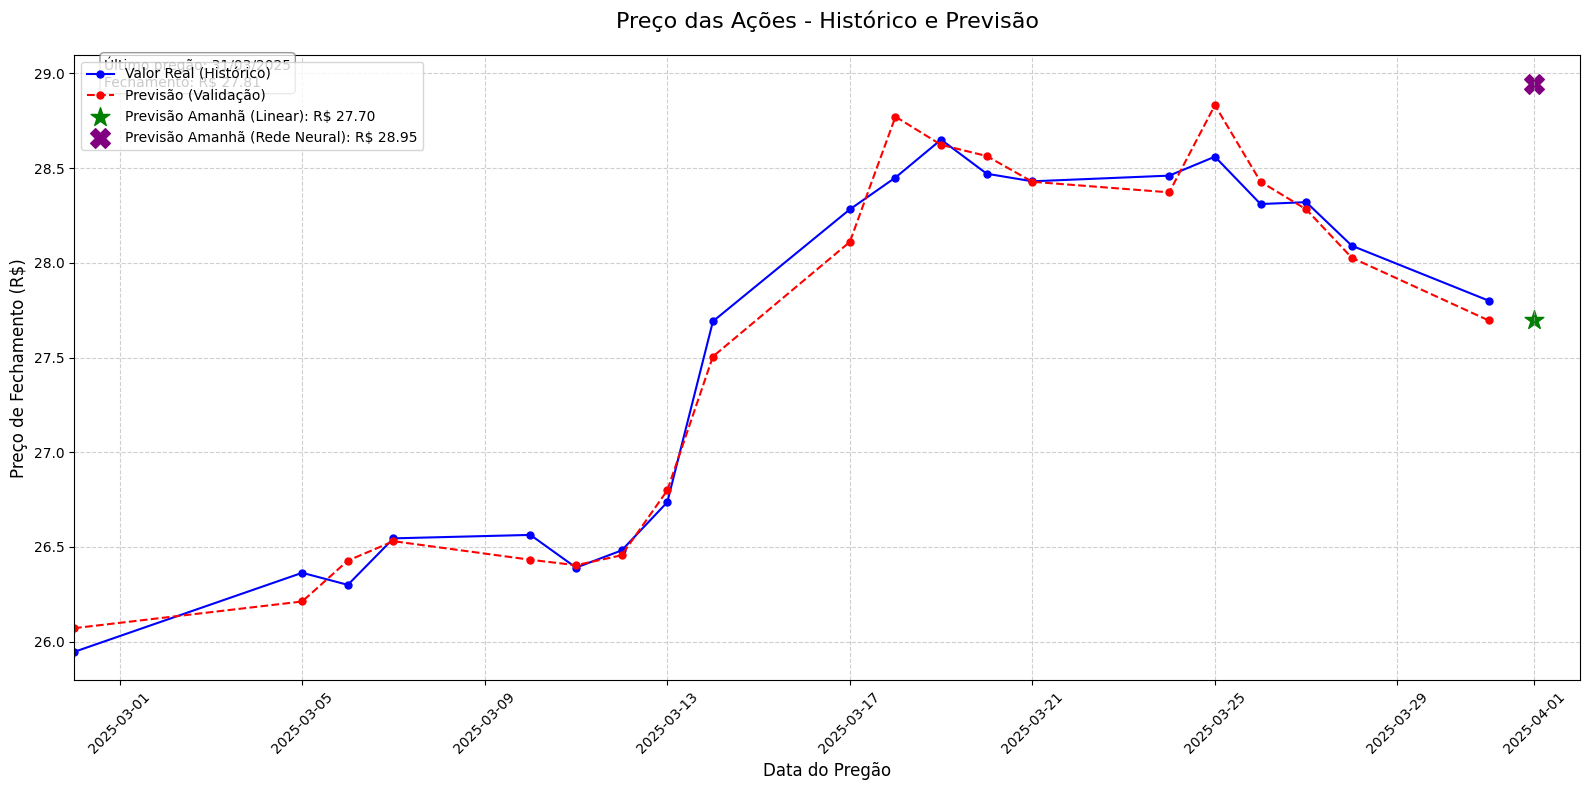

In [ ]:
# Configurações do gráfico
plt.figure(figsize=(16, 8))
plt.title('Preço das Ações - Histórico e Previsão', fontsize=16, pad=20)

# Plot dos dados históricos
plt.plot(df.index, df['Real'],
         label='Valor Real (Histórico)',
         color='blue',
         marker='o',
         linestyle='-',
         linewidth=1.5,
         markersize=5)

# Plot das previsões (validação)
plt.plot(df.index, df['Previsão'],
         label='Previsão (Validação)',
         color='red',
         marker='o',
         linestyle='--',
         linewidth=1.5,
         markersize=5)

# Adicionando a previsão para amanhã
ultima_data = df.index[-1]
proxima_data = ultima_data + pd.Timedelta(days=1)

plt.scatter(proxima_data, previsao_amanha_lr,
            label=f'Previsão Amanhã (Linear): R$ {previsao_amanha_lr:.2f}',
            color='green',
            marker='*',
            s=200)

plt.scatter(proxima_data, previsao_amanha_rn,
            label=f'Previsão Amanhã (Rede Neural): R$ {previsao_amanha_rn:.2f}',
            color='purple',
            marker='X',
            s=200)

# Formatação do gráfico
plt.xlabel('Data do Pregão', fontsize=12)
plt.ylabel('Preço de Fechamento (R$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend(fontsize=10, loc='upper left')

# Adiciona anotações
plt.annotate(f'Último pregão: {dados_hoje.index[-1].strftime("%d/%m/%Y")}\n'
            f'Fechamento: R$ {float(dados_hoje["Fechamento"].iloc[-1]):.2f}',
            xy=(0.02, 0.95),
            xycoords='axes fraction',
            bbox=dict(boxstyle='round', fc='white', ec='gray', alpha=0.8))

# Ajusta os limites do eixo X para incluir a previsão
plt.xlim([df.index[0], proxima_data + pd.Timedelta(days=1)])

plt.tight_layout()
plt.show()

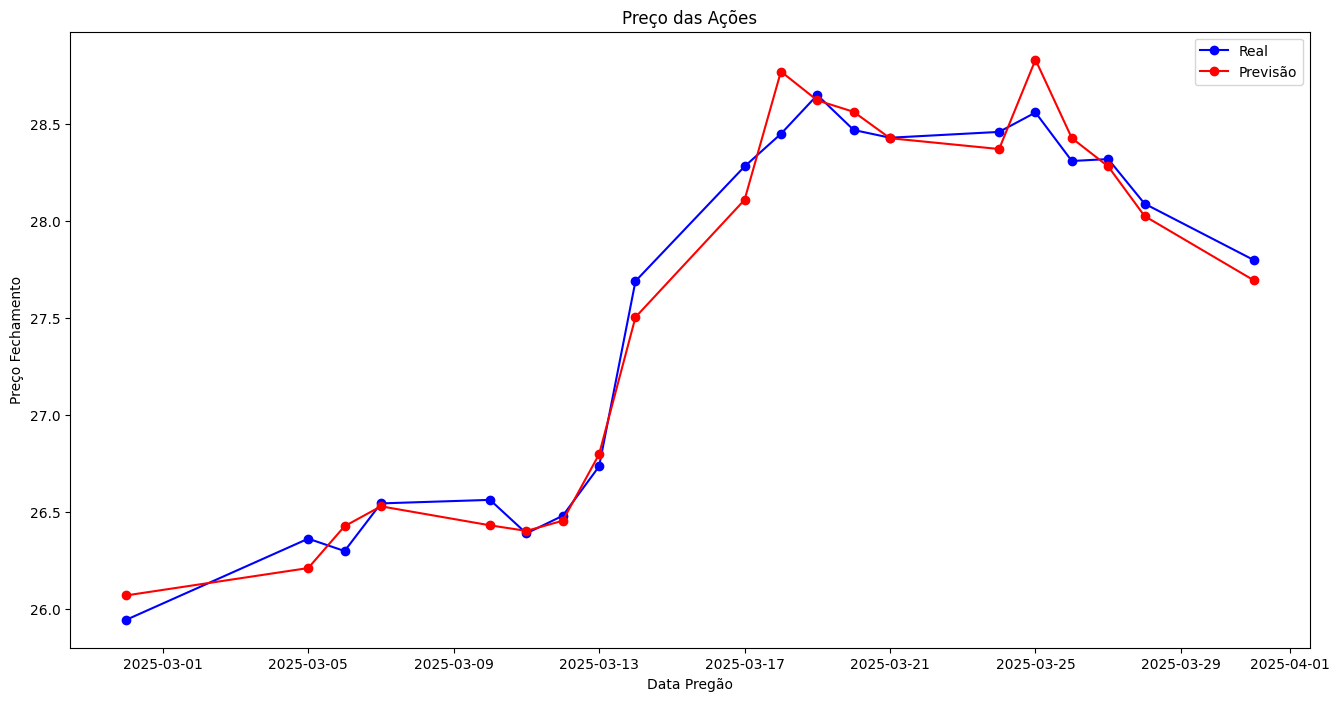

In [ ]:
# Gerando o Gráfico
plt.figure(figsize = (16,8))
plt.title('Preço das Ações')
plt.plot(df['Real'], label = 'Real', color = 'blue', marker = 'o')
plt.plot(df['Previsão'], label = 'Previsão', color = 'red', marker = 'o')
plt.xlabel('Data Pregão')
plt.ylabel('Preço Fechamento')
leg = plt.legend()